### Take Test: WEEK 4: FRIDAY LAB 03
 

1. Be sure that your code works and is clearly written and commented. (5 points)

In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity

#Reading in the Olympic history: athletes and results  as olympic and results dataframe
olympic = pd.read_csv('archive/athlete_events.csv')


#Verifying that we can see the data
olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


The Chosen data types include Age, Sport and Weight

In [44]:
# change data to determine the various associations
olympic['Age'] = olympic['Age']
olympic['Sport'] = olympic['Sport'].astype("category")



olympic.dtypes[['Age']]

Age    float64
dtype: object

In [45]:
# Removed the NA rows from age and Weight to perform numeric measures of association
olympic = olympic[olympic['Weight'].notna()]
olympic = olympic[olympic['Age'].notna()]
olympic

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [46]:
#cosine Similarity

# Here is a solution that uses the spatial package from scipy

a = np.array(olympic.Age)
b = np.array(olympic.Weight)


result = 1 - spatial.distance.cosine(a, b)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians = math.acos(result)
degrees = math.degrees(angle_in_radians)

print(result, degrees)

0.9663348733400414 14.909178985958029


In [54]:
# Chi Square between Sport and Weight 
chi2, p, dof, expected = chi2_contingency((pd.crosstab(olympic.Sport, olympic.Weight).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 163854.44874072715 ,p-value: 0.0, Degrees of Freedom: 12045


In [55]:
# Chi Square between Sport and Age 
chi2, p, dof, expected = chi2_contingency((pd.crosstab(olympic.Sport, olympic.Age).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 134461.46074210986 ,p-value: 0.0, Degrees of Freedom: 3300


In [50]:
# Covariance between age and Height
np.cov([olympic.Age], [olympic.Weight], bias = True)[0][1]

16.7163117838728

In [51]:
corr = olympic.corr()
corr

,ID,Age,Height,Weight,Year
ID,1.000000,-0.001943,-0.012190,-0.009428,0.006834
Age,-0.001943,1.000000,0.141684,0.212069,0.082940
Height,-0.012190,0.141684,1.000000,0.796573,0.048142
Weight,-0.009428,0.212069,0.796573,1.000000,0.018816
Year,0.006834,0.082940,0.048142,0.018816,1.000000


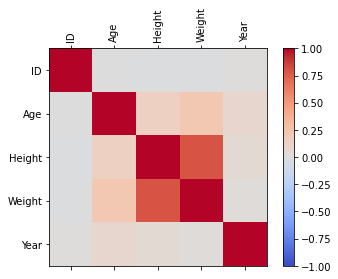

In [52]:
# make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [53]:
# correlation between the Age and Weight
olympic['Age'].corr(olympic['Weight'])

0.21206886474817563

2. 
       1. How did you decide which attributes to pick for your analysis? (1 point)


To carry out all the Measures of association i choose associated attributes Age and Weight and the categorical data column Sport.

2. 
       2. What connections between the attributes do the results of your analysis reveal? Were there any surprises? (2points)


In the measures of association covariance revealved that both Age and Weight have a positive covariance and in correlation that they are also positively correlated. It was suprises to see how both age and Weight were dependent on the Sport.


2. 
        2. Would you be able to predict future values of one attribute from a correlation with one or two others? Research how you could do this in your chosen language and try it out. (2 points)
        
        Yes wee would be able to predict future values of one attribute from a correlation with one or two others. You could predict the future with age and height to by first determining their correlation to one another and the determine their correlation to determine what to expect

In [56]:
# Chi Square between Medal and Age Example
chi2, p, dof, expected = chi2_contingency((pd.crosstab(olympic.Medal, olympic.Age).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 86.82979436973599 ,p-value: 0.823274656569306, Degrees of Freedom: 100


In [57]:
# Chi Square between Medal and Height 
chi2, p, dof, expected = chi2_contingency((pd.crosstab(olympic.Medal, olympic.Height).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 281.7810301144055 ,p-value: 1.5178978043422642e-07, Degrees of Freedom: 170


In [58]:
# correlation between the Age and Weight
olympic['Age'].corr(olympic['Height'])

0.14168449010056808